# Open Exploration for 400 Scenarios and 75 Policies

## 1. Introduction

This notebook is the open exploration for a sampled case with 400 scenarios and 75 policies. These are randomly sampled across the uncertainties and levers using [Latin Hypercube Sampling](https://www.wikiwand.com/en/Latin_hypercube_sampling). 

The notebook gives a better indication of the policy space. To derive the worst scenarions in 1-Open-Exploration-Base-Case.ipynb to work, it is assumed that the base case is the worst case. This assumption will be tested here.

In [1]:
# Load dependencies

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# Specific ema_workbench functions
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\newbi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [3]:
# Load in self-created visualization functions
from visualization_functions import histogram_maker, mean_outcomes, aggregate_outcomes, scatter_maker, pairplot_maker, boxplot_histogram_maker, boxplot_maker

In [4]:
results = utilities.load_results('Outcomes/400Scenarios75Policies.csv')

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
results = results.drop(columns="model")
results.head()

[MainProcess/INFO] results loaded succesfully from C:\Users\newbi\project-local\Model-based-decision-making\Outcomes\400Scenarios75Policies.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,32.0,81.751501,1.5,0.141941,169.323971,1.5,0.425835,57.951058,1.0,0.364625,...,2.005502e+08,0.0,0.0,0,0.0,0.0,1.663578e+08,0.0,151900000.0,0.0
1,62.0,93.449914,10.0,0.099068,70.300209,10.0,0.974053,304.605118,10.0,0.106666,...,2.005502e+08,0.0,0.0,0,0.0,0.0,1.663578e+08,0.0,151900000.0,0.0
2,79.0,49.275959,10.0,0.187890,298.239351,1.5,0.075252,251.567603,10.0,0.827428,...,2.005502e+08,0.0,0.0,0,0.0,0.0,1.663578e+08,0.0,151900000.0,0.0
3,80.0,195.660790,10.0,0.148354,91.746886,1.5,0.577773,306.575882,1.0,0.978201,...,2.005502e+08,0.0,0.0,0,0.0,0.0,1.663578e+08,0.0,151900000.0,0.0
4,122.0,309.503594,10.0,0.923048,100.068083,1.5,0.241638,101.324602,1.0,0.722349,...,2.005502e+08,0.0,0.0,0,0.0,0.0,1.663578e+08,0.0,151900000.0,0.0


In [5]:
aggregate_outcomes(results, "Expected Annual Damage")
aggregate_outcomes(results, "Expected Number of Deaths")

## 2. Data visualization

Visual examination on the data to have a better understanding of what is happening in the model.

### 2.1 Histogram plots

A distribution of the outcomes over location and timesteps are given. These histograms only showcase the expected annual damages and the expected number of deaths, the costs outcomes are not interesting as they are all 0 in the base case. 

#### 2.1.1 Expected Number of Deaths

Plot Expected Number of Deaths(Histogram)
This is timestep 0


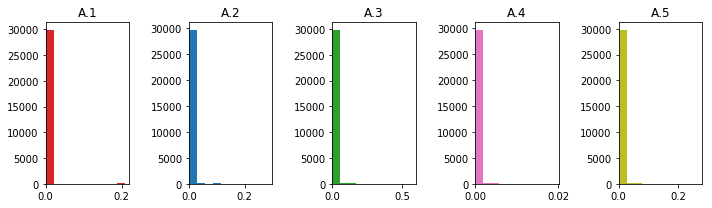

This is timestep 1


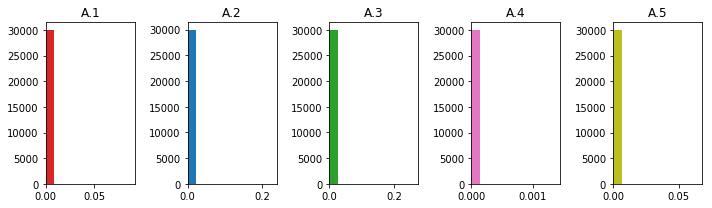

This is timestep 2


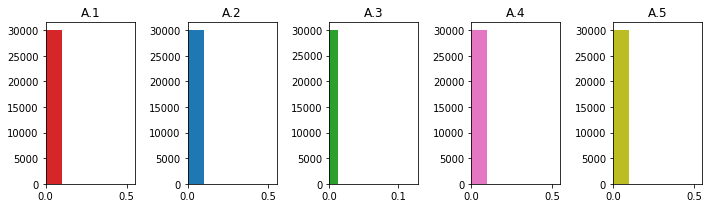

In [6]:
histogram_maker(results, "Expected Number of Deaths")

#### 2.1.2 Expected Annual Damage

Plot Expected Annual Damage(Histogram)
This is timestep 0


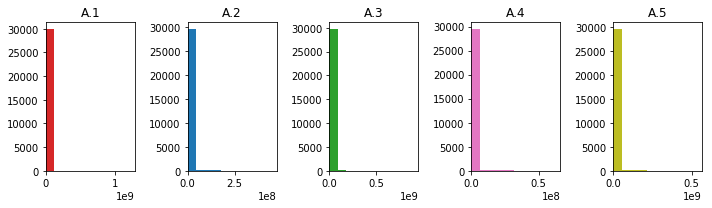

This is timestep 1


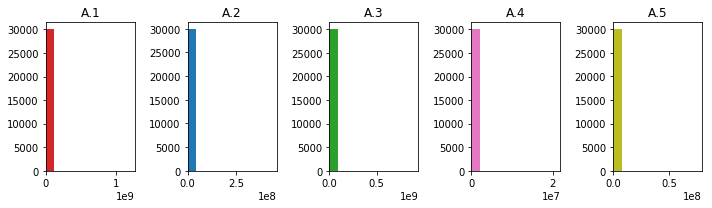

This is timestep 2


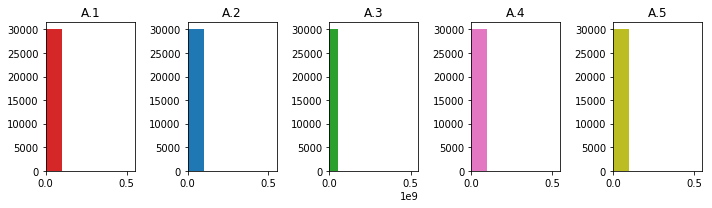

In [7]:
histogram_maker(results, "Expected Annual Damage")

### 2.2 Mean outcomes

To visualize which location is most heavily impacted across all scenarios the mean is shown over the disaggregated locations and time step. Compared to the base case, this also includes the costs associated with the policies.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


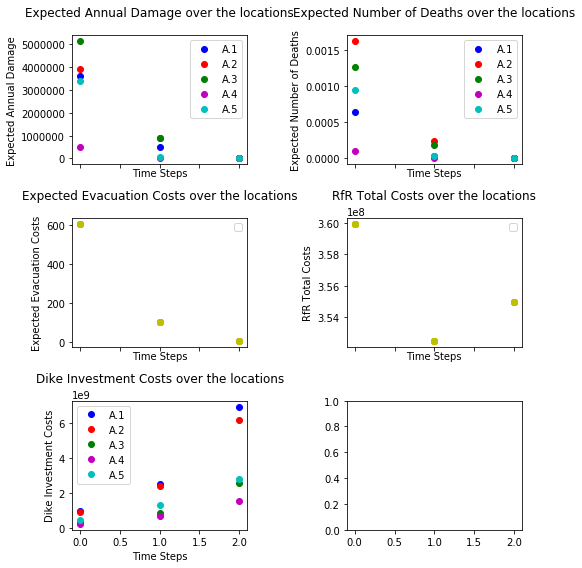

In [8]:
# Select the outcomes you want the mean, for base case the costs are not very interesting.
outcome_names = ["Expected Annual Damage", "Expected Number of Deaths", "Expected Evacuation Costs", "RfR Total Costs",
                "Dike Investment Costs"]

mean_outcomes(results, outcome_names)

### 2.3 Pairplot

A pairplot is a good way to visualize any apparent trade-offs between outcomes. The pairplot is location and time based to keep the interpretability manageable.

In [9]:
# Takes more time to load than other visualizations
interact(pairplot_maker, results=fixed(results), n=[1, 2, 3], location=["A.1", "A.2", "A.3", "A.4", "A.5"]);

interactive(children=(Dropdown(description='location', options=('A.1', 'A.2', 'A.3', 'A.4', 'A.5'), value='A.1…

### 2.4 Boxplots across policies

The policies are then reviewed through a boxplot over the total aggregate score of damages and deaths. 

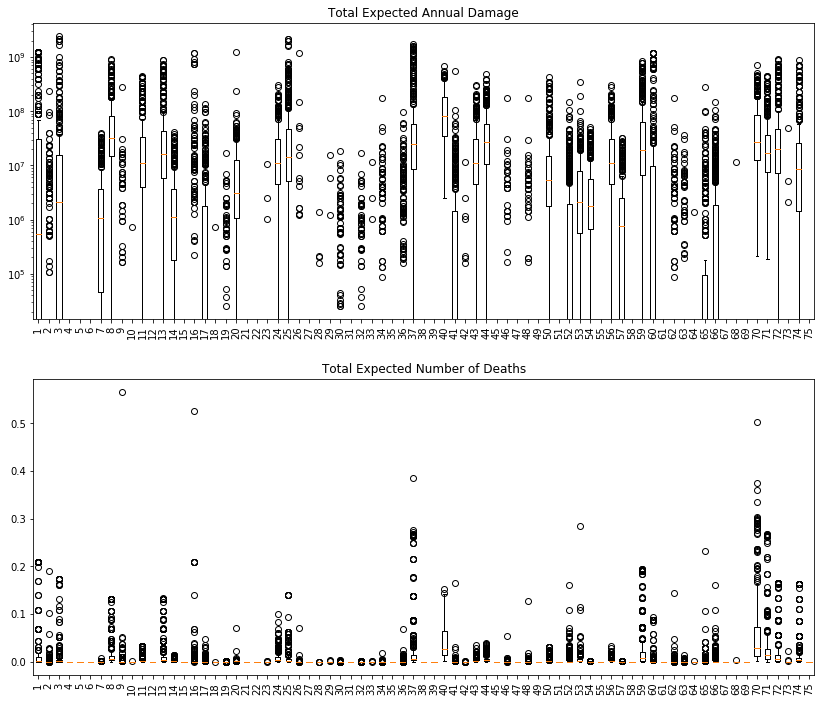

In [10]:
total_outcomes = ["Total Expected Annual Damage", "Total Expected Number of Deaths"]

boxplot_maker(results, total_outcomes)

In summary, visual comparisons between the base case show that the assumption holds, seeing that base case performs worse in every plot. 

Total Expected Number of Deaths First quartile (0.25): 0.0
Total Expected Number of Deaths Last quartile (0.75): 0.0006558931811736293
Total Expected Number of Deaths Mean: 0.005079921671296273
Total Expected Annual Damage First quartile (0.25): 0.0
Total Expected Annual Damage Last quartile (0.75): 3137222.572326797
Total Expected Annual Damage Mean: 18941924.60580092


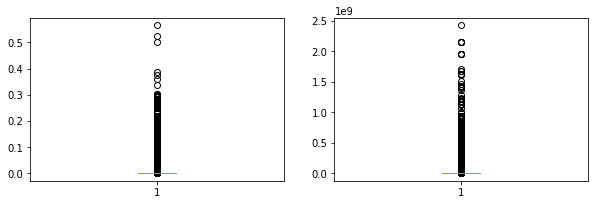

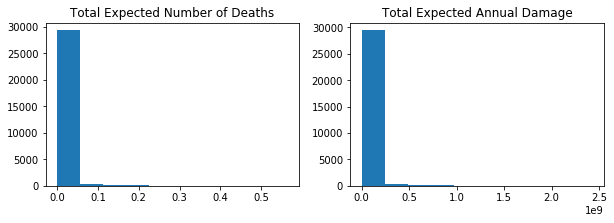

In [11]:
boxplot_histogram_maker(results)

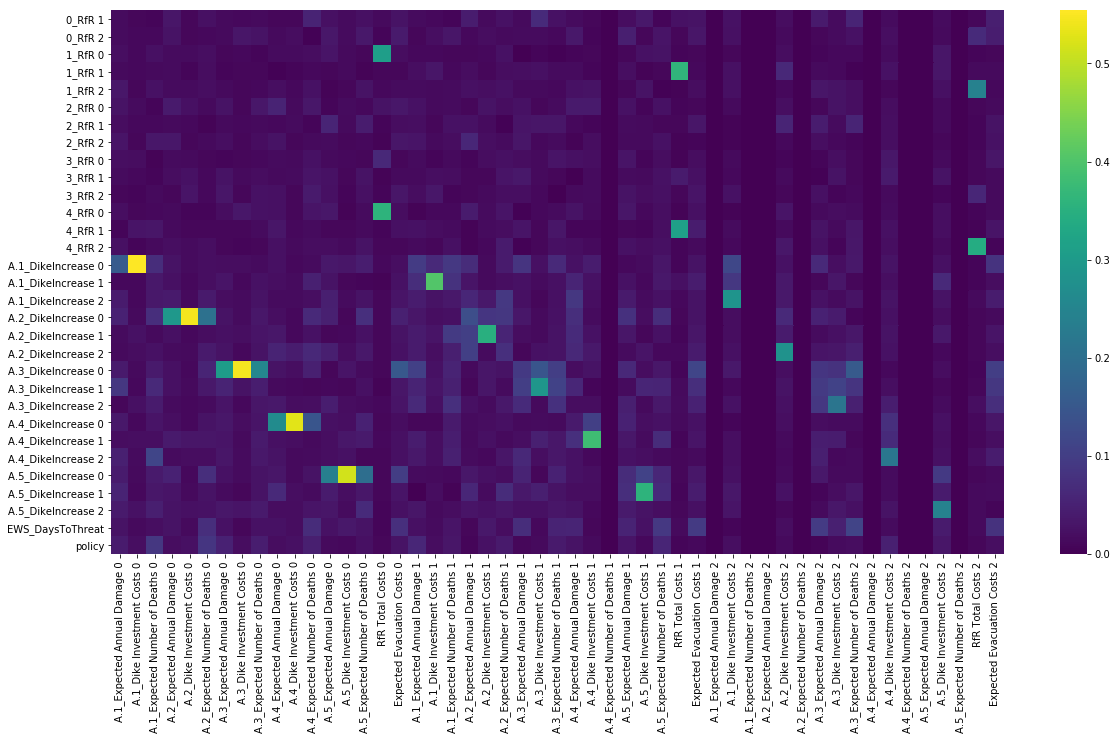

In [43]:
from ema_workbench.analysis import feature_scoring

fs = feature_scoring.get_feature_scores_all(x, y)
fig = plt.subplots(figsize=(20,10))
sns.heatmap(fs, cmap='viridis')
plt.show()